In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('divorce.csv')
df

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy import random

# Preparing the Model

In [3]:
# Separating Attributes and Results
y = df['Divorce_Y_N'].copy()
x = df.drop('Divorce_Y_N', axis=1).copy()

# Separating Test and Train
x_train, x_test, y_train, y_test = train_test_split (x,y, train_size=0.7, shuffle=True, random_state=1)


# Traning a Model

In [4]:
model = LogisticRegression()
model.fit(x_train,y_train)
print("Test Accuracy ({} Attributes): {:.2f}%".format(attributes, model.score(x_test_pca, y_test) * 100))

Test Accuracy: 96.15%


<AxesSubplot:>

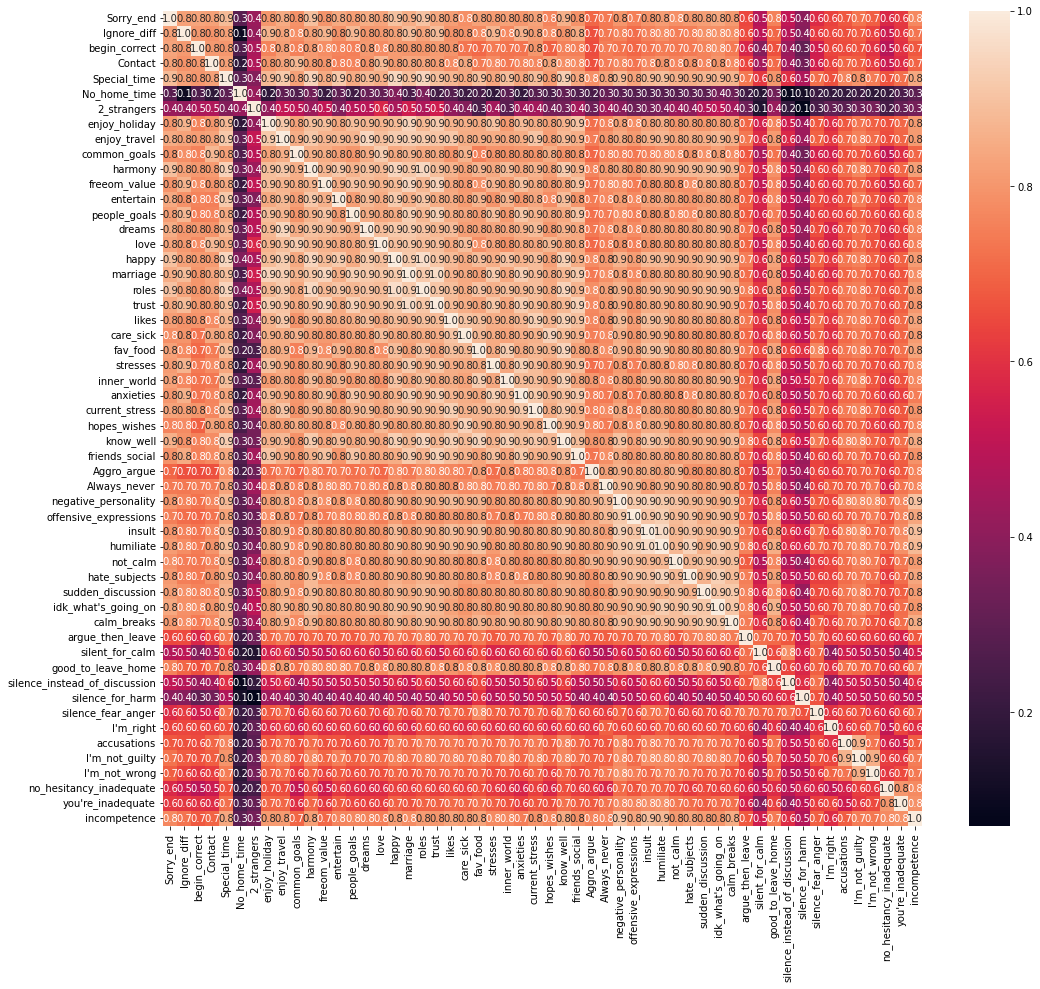

In [5]:
matriz_correlacao = x.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

# PCA for Dimensionality Reduction

In [6]:
attributes = 54

pca = PCA(n_components = attributes)
pca.fit(x_train)

x_train_pca = pd.DataFrame(pca.transform(x_train), index = x_train.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_train_pca.var()

Question1     94.289739
Question2      4.671466
Question3      3.137466
Question4      2.128398
Question5      1.943608
Question6      1.640296
Question7      1.408071
Question8      1.252030
Question9      1.144264
Question10     1.059159
Question11     0.989216
Question12     0.899597
Question13     0.800498
Question14     0.741912
Question15     0.665373
Question16     0.607388
Question17     0.582738
Question18     0.550561
Question19     0.480481
Question20     0.448337
Question21     0.420682
Question22     0.339643
Question23     0.318652
Question24     0.294165
Question25     0.276634
Question26     0.252946
Question27     0.237256
Question28     0.226096
Question29     0.213925
Question30     0.195329
Question31     0.168120
Question32     0.150751
Question33     0.143110
Question34     0.127196
Question35     0.123803
Question36     0.106084
Question37     0.103677
Question38     0.099730
Question39     0.091508
Question40     0.081303
Question41     0.075257
Question42     0

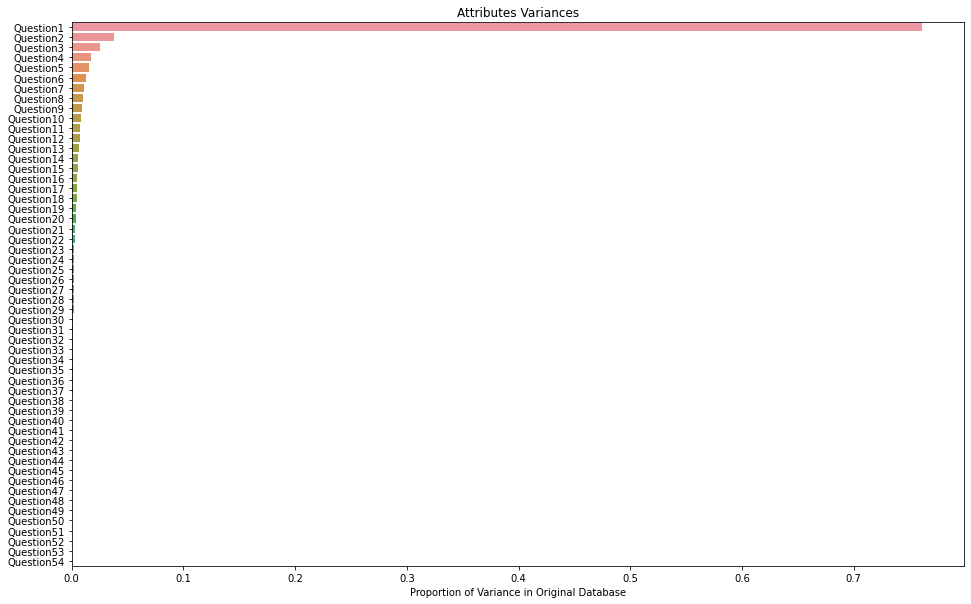

In [7]:
plt.figure(figsize=(16,10))
sns.barplot(x=pca.explained_variance_ratio_, y=['Question'+ str(i) for i in range(1, attributes + 1)], orient='h')
plt.title('Attributes Variances')
plt.xlabel('Proportion of Variance in Original Database')
plt.show()

In [8]:
# First 10 Questions are more important for the Model
attributes = 10

pca = PCA(n_components = attributes)
pca.fit(x_train)

x_train_pca = pd.DataFrame(pca.transform(x_train), index = x_train.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_train_pca
x_test_pca = pd.DataFrame(pca.transform(x_test), index = x_test.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_test_pca

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10
48,11.642674,-2.633215,1.350218,-1.656010,-0.107926,0.608353,2.650494,0.528233,0.356944,1.438065
91,-10.571378,0.457121,0.497469,0.046669,1.598593,-0.910900,0.642894,0.517464,-0.602521,-0.670802
19,13.956344,0.935122,-2.038320,2.314250,0.661466,-0.953301,0.288475,-0.672133,-0.840657,1.746300
35,12.202344,-1.461944,0.464855,-0.192584,0.107077,-0.345433,-0.677329,-0.053841,0.124264,-0.598187
164,-7.847375,2.197207,1.134587,-0.015044,0.455780,-0.329464,0.770010,1.199195,0.673256,0.293409
88,-10.548197,4.228985,0.169560,-0.311378,2.036062,0.318522,0.576806,0.103918,1.799176,0.471215
106,-9.748035,-2.654306,-0.782111,0.142682,1.279940,0.868462,-0.480232,-0.266659,-0.807180,0.483424
14,13.914752,0.050750,-0.643427,1.539257,0.593361,-1.165409,-1.874148,-1.288603,-0.131812,-1.317189
123,-9.023737,-0.629521,0.441387,0.791288,2.013560,0.076438,1.015400,1.912523,-1.922535,-0.928990
118,-9.005847,-0.257779,-0.731784,0.704235,2.792600,-0.042438,1.482488,2.052170,-1.745105,-1.777459


# Training a new Model with the most important attributes

In [9]:
model = LogisticRegression()
model.fit(x_train_pca,y_train)
print("Test Accuracy ({} Attributes): {:.2f}%".format(attributes, model.score(x_test_pca, y_test) * 100))

Test Accuracy: 96.15%


In [10]:
# First 10 Questions are more important for the Model
attributes = 1

pca = PCA(n_components = attributes)
pca.fit(x_train)

x_train_pca = pd.DataFrame(pca.transform(x_train), index = x_train.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_train_pca
x_test_pca = pd.DataFrame(pca.transform(x_test), index = x_test.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_test_pca

,Question1
48,11.642674
91,-10.571378
19,13.956344
35,12.202344
164,-7.847375
88,-10.548197
106,-9.748035
14,13.914752
123,-9.023737
118,-9.005847


In [11]:
model = LogisticRegression()
model.fit(x_train_pca,y_train)
print("Test Accuracy ({} Attributes): {:.2f}%".format(attributes, model.score(x_test_pca, y_test) * 100))

Test Accuracy (1 Attributes): 96.15%


# Using PCA for Visualization

In [12]:
attributes = 2

pca = PCA(n_components = attributes)
pca.fit(x_train)

x_train_pca = pd.DataFrame(pca.transform(x_train), index = x_train.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_train_pca
x_test_pca = pd.DataFrame(pca.transform(x_test), index = x_test.index, columns = ['Question'+ str(i) for i in range(1, attributes + 1)])
x_test_pca

,Question1,Question2
48,11.642674,-2.633215
91,-10.571378,0.457121
19,13.956344,0.935122
35,12.202344,-1.461944
164,-7.847375,2.197207
88,-10.548197,4.228985
106,-9.748035,-2.654306
14,13.914752,0.050750
123,-9.023737,-0.629521
118,-9.005847,-0.257779


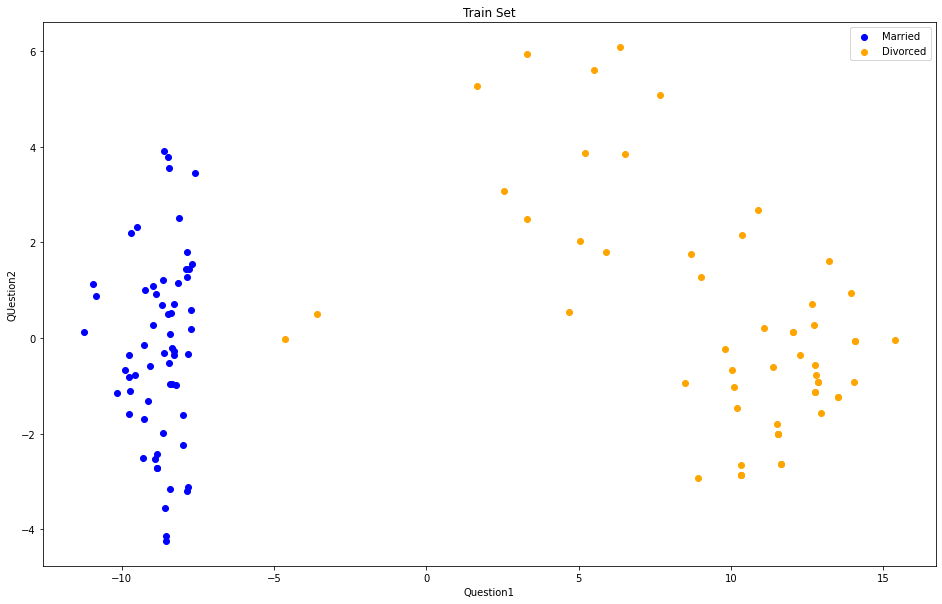

In [13]:
# similar to clutering visualization
plt.figure(figsize=(16, 10))
plt.scatter(x_train_pca.loc[y_train == 0, 'Question1'], x_train_pca.loc[y_train == 0, 'Question2'], label="Married", color='blue')
plt.scatter(x_train_pca.loc[y_train == 1, 'Question1'], x_train_pca.loc[y_train == 1, 'Question2'], label="Divorced", color='orange')
plt.xlabel("Question1")
plt.ylabel("QUestion2")
plt.title("Train Set")
plt.legend()
plt.show()

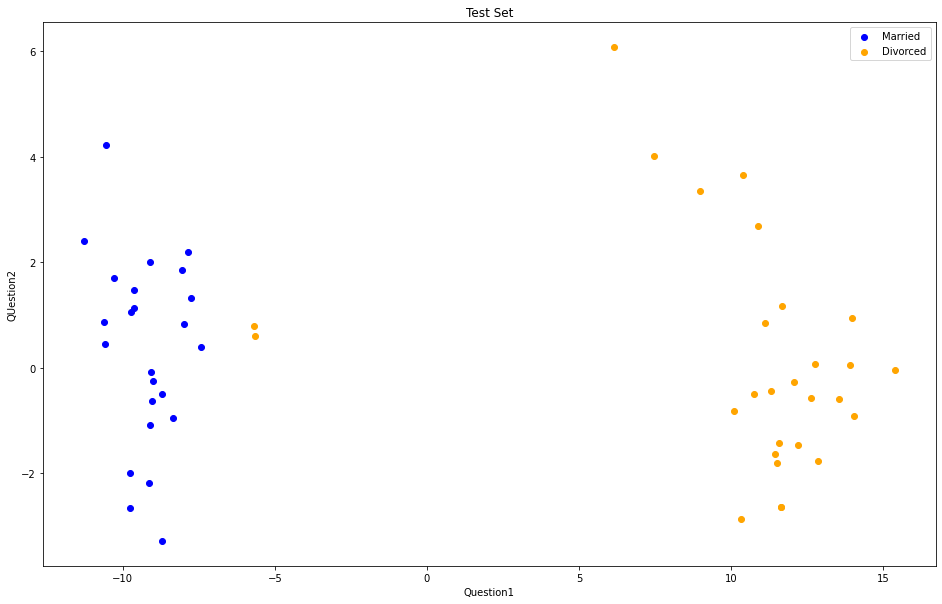

In [14]:
# similar to clustering visualization
plt.figure(figsize=(16, 10))
plt.scatter(x_test_pca.loc[y_test == 0, 'Question1'], x_test_pca.loc[y_test == 0, 'Question2'], label="Married", color='blue')
plt.scatter(x_test_pca.loc[y_test == 1, 'Question1'], x_test_pca.loc[y_test == 1, 'Question2'], label="Divorced", color='orange')
plt.xlabel("Question1")
plt.ylabel("QUestion2")
plt.title("Test Set")
plt.legend()
plt.show()

In [15]:
model = LogisticRegression()
model.fit(x_train_pca,y_train)
print("Test Accuracy ({} Attributes): {:.2f}%".format(attributes, model.score(x_test_pca, y_test) * 100))

Test Accuracy: 96.15%


# Misclassifications of the Model

In [16]:
misclassifications = x_test_pca.loc[model.predict(x_test_pca) != y_test]
misclassifications

,Question1,Question2
4,-5.637804,0.597580
5,-5.674198,0.800159


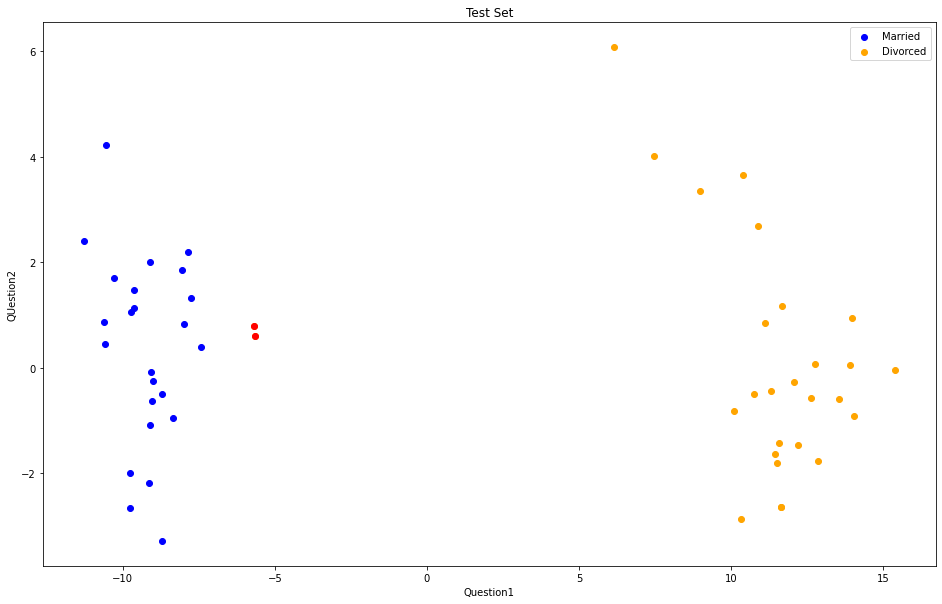

In [17]:
plt.figure(figsize=(16, 10))
plt.scatter(x_test_pca.loc[y_test == 0, 'Question1'], x_test_pca.loc[y_test == 0, 'Question2'], label="Married", color='blue')
plt.scatter(x_test_pca.loc[y_test == 1, 'Question1'], x_test_pca.loc[y_test == 1, 'Question2'], label="Divorced", color='orange')
plt.scatter(misclassifications['Question1'], misclassifications['Question2'], color='red')
plt.xlabel("Question1")
plt.ylabel("QUestion2")
plt.title("Test Set")
plt.legend()
plt.show()